<a href="https://colab.research.google.com/github/invegat/DS-Unit-2-Sprint-2-Linear-Regression/blob/master/module3-gradient-descent/Gradient_Descent_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gradient Descent Implementation Challenge!!

## Use gradient descent to find the optimal parameters of a **multiple** regression model. (We only showed an implementation for a bivariate model during lecture.)

A note: Implementing gradient descent in any context is not trivial, particularly the step where we calculate the gradient will change based on the number of parameters that we're trying to optimize for. You will need to research what the gradient of a multiple regression model looks like. This challenge is pretty open-ended but I hope it will be thrilling. Please work together, help each other, share resources and generally expand your understanding of gradient descent as you try and achieve this implementation. 

## Suggestions:

Start off with a model that has just two $X$ variables You can use any datasets that have at least two x variables. Potential candidates might be the blood pressure dataset that we used during lecture on Monday: [HERE](https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/mlr/excel/mlr02.xls) or any of the housing datasets. You would just need to select from them the two varaibles $x$ variables and one y variable that you want to work with that you most want to work with. 

Use Sklearn to find the optimal parameters of your model first. (like we did during the lecture.) So that you can compare the parameter estimates of your gradient-descent linear regression to the estimates of OLS linear regression. If implemented correctly they should be nearly identical.

Becoming a Data Scientist is all about striking out into the unknown, getting stuck and then researching and fighting and learning until you get yourself unstuck. Work together! And fight to take your own learning-rate fueled step towards your own optimal understanding of gradient descent! 


In [1]:
!pip install -U matplotlib

Requirement already up-to-date: matplotlib in /usr/local/lib/python3.6/dist-packages (3.0.2)


## Stretch Goals

If you happen upon the most useful resources for accomplishing this challenge first, I want you to spend time today studying other variations of Gradient Descent-Based Optimizers.

- Try and write a function that can perform gradient descent for arbitarily large (in dimensionality) multiple regression models. 
- Create a notebook for yourself exploring these topics
- How do they differ from the "vanilla" gradient descent we explored today
- How do these different gradient descent-based optimizers seek to overcome the challenge of finding the global minimum among various local minima?
- Write a blog post that reteaches what you have learned about these other gradient descent-based optimizers.

[Overview of GD-based optimizers](http://ruder.io/optimizing-gradient-descent/)

[Siraj Raval - Evolution of Gradient Descent-Based Optimizers](https://youtu.be/nhqo0u1a6fw)

In [121]:
%matplotlib inline  
# %matplotlib notebook
# %pylab
import matplotlib
matplotlib._version.sys.version

'3.6.7 (default, Oct 22 2018, 11:32:17) \n[GCC 8.2.0]'

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from datetime import datetime
import math
from scipy.stats import mode
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

In [123]:
xls_file = pd.ExcelFile('https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/mlr/excel/mlr02.xls')
xls_file

*** No CODEPAGE record, no encoding_override: will use 'ascii'


In [124]:
xls_file.sheet_names

['Sheet 1']

In [136]:
df = xls_file.parse('Sheet 1',names=['BP','age', 'lbs'])
df

,BP,age,lbs
0,132,52,173
1,143,59,184
2,153,67,194
3,162,73,211
4,154,64,196
5,168,74,220
6,137,54,188
7,149,61,188
8,159,65,207
9,128,46,167


In [137]:
scaler = StandardScaler()
std = scaler.fit_transform(df)
sdf = pd.DataFrame(std, columns = df.columns)
sdf = df

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [138]:
sdf

,BP,age,lbs
0,132,52,173
1,143,59,184
2,153,67,194
3,162,73,211
4,154,64,196
5,168,74,220
6,137,54,188
7,149,61,188
8,159,65,207
9,128,46,167


In [0]:
def predict(features, weights):
  '''
  features - (11, 3)
  weights - (3, 1)
  predictions - (11,1)
  '''
  #print('predict features.shape', features.shape)
  return np.dot(features,weights)

In [0]:
def bp_function(features, targets, weights):
    '''
    Features:(11,3)
    Targets: (11,1)
    Weights:(3,1)
    Returns average squared error among predictions
    '''
    N = len(targets)

    predictions = predict(features, weights)

    # Matrix math lets use do this without looping
    r = np.subtract(predictions.ravel(), targets.ravel())
    # print('r.shape',r.shape)
    print('r',r)
    print('predictions', predictions)
    print('targets', targets)
    # print('r',r,predictions.ravel(), predictions, features,weights)
    # print('r[0,0]',r[0,0])
#     sq_error = r.T*r
    sum_ = 0
    for i in range(r.shape[1]):
      sum_ += r[0,i] ** 2
    # print('test == sq_error.sum()', test == sq_error.sum(), test,sq_error.sum())
    # Return average squared error among predictions
    return 1.0/(2*N) * sum_

In [0]:
def update_weights(features, targets, weights, lr):
    '''
    Features:(200, 2)
    Targets: (200, 1)
    Weights:(2, 1)
    '''
#     print('update_weights', weights)
    predictions = predict(features, weights)

    #Extract our features
    x_lbs = features[:,0]
#     x_lbs = list(x_lbs)
    x_age = features[:,1]
    x_bias = features[:,2]
#     x_age = list(x_age)
#     print('x_lbs.shape', x_lbs.shape)
    r = np.subtract(targets.ravel(), predictions.ravel())
#     print('r.T.shape', r.T.shape)

    # Use matrix cross product (*) to simultaneously
    # calculate the derivative for each weight
    d_w_lbs = -(x_lbs * r)
    d_w_age = -(x_age * r)
    d_w_bias = -(x_bias * r)
    print('update weights d_w_lbs',d_w_lbs, d_w_lbs.shape, 'x_lbs',x_lbs)
#     print('np.mean(d_w_lbs)',np.mean(d_w_lbs))


    # Multiply the mean derivative by the learning rate
    # and subtract from our weights (remember gradient points in direction of steepest ASCENT)
    weights[0][0] -= (lr * np.mean(d_w_lbs))
    weights[1][0] -= (lr * np.mean(d_w_age))
    weights[2][0] -= (lr * np.mean(d_w_bias))

    return weights

In [0]:
def train(lbs,age,bias, BP, weights, learning_rate, iters):
    bp_history = []
    #print(lbs.shape, age.shape, BP.shape,weights, learning_rate,iters)
    # print('weights',weights)
    for i in range(iters):
        weights = update_weights(np.matrix([lbs, age, bias]).T, BP.T, weights, learning_rate)
        #print('weights',weights)
        #Calculate bp for auditing purposes
        bp_error = bp_function(np.matrix([lbs, age, bias]).T, BP.T, weights)
        bp_history.append(bp_error)

        # Log Progress
#         if i % 10 == 0:
#             print("iter: "+str(i) + " bp: "+str(bp))

    return weights, bp_error#, bp_history

In [223]:
W_lbs = 0.0
W_age = 0.0
W_intercept = 0.0

weights = np.array([
    [W_lbs],
    [W_age],
    [W_intercept]
])
lr = .00001
bias = np.ones(shape=(len(df)))

coef = train(df['lbs'],df['age'],bias, df['BP'], weights, lr, 20)
coef

update weights d_w_lbs [[-22836. -24739. -26469. -28026. -26642. -29064. -23701. -25777. -27507.
  -22144. -28718.]
 [-24288. -26312. -28152. -29808. -28336. -30912. -25208. -27416. -29256.
  -23552. -30544.]
 [-25608. -27742. -29682. -31428. -29876. -32592. -26578. -28906. -30846.
  -24832. -32204.]
 [-27852. -30173. -32283. -34182. -32494. -35448. -28907. -31439. -33549.
  -27008. -35026.]
 [-25872. -28028. -29988. -31752. -30184. -32928. -26852. -29204. -31164.
  -25088. -32536.]
 [-29040. -31460. -33660. -35640. -33880. -36960. -30140. -32780. -34980.
  -28160. -36520.]
 [-24816. -26884. -28764. -30456. -28952. -31584. -25756. -28012. -29892.
  -24064. -31208.]
 [-24816. -26884. -28764. -30456. -28952. -31584. -25756. -28012. -29892.
  -24064. -31208.]
 [-27324. -29601. -31671. -33534. -31878. -34776. -28359. -30843. -32913.
  -26496. -34362.]
 [-22044. -23881. -25551. -27054. -25718. -28056. -22879. -24883. -26553.
  -21376. -27722.]
 [-28644. -31031. -33201. -35154. -33418. -3645

(array([[0.69805782],
        [0.22357376],
        [0.00357978]]), 3.849872793357337)

In [217]:
print(f"lbs: {sdf.loc[0,'lbs']} age: {sdf.loc[0,'age']} BP: {sdf.loc[0,'BP']}")
print(f"lbs: {sdf.loc[0,'lbs'] * 0.462645} age: {sdf.loc[0,'age'] * 0.14817581} BP: {sdf.loc[0,'BP']}")
print(f"pass 20 lbs: {sdf.loc[0,'lbs'] * 0.69805782} age: {sdf.loc[0,'age'] * 0.22357376} BP: {sdf.loc[0,'BP']}")
print(f"lbs: {sdf.loc[0,'lbs'] * 0.33485919716568985} age: {sdf.loc[0,'age'] * 0.8614146864683601 } BP: {sdf.loc[0,'BP']}")

lbs: 173 age: 52 BP: 132
lbs: 80.03758499999999 age: 7.70514212 BP: 132
pass 20 lbs: 120.76400286 age: 11.62583552 BP: 132
lbs: 57.93064110966434 age: 44.793563696354724 BP: 132


In [207]:
model = LinearRegression().fit(sdf[['lbs', 'age']], sdf['BP'])
coef_ = model.coef_
print('𝛽₁: {}  𝛽₂: {}  𝛽₀ {}'.format(coef_[0], coef_[1], model.intercept_))

𝛽₁: 0.33485919716568985  𝛽₂: 0.8614146864683601  𝛽₀ 30.994102952348356


In [0]:
X2, X3 = np.meshgrid(sdf['lbs'], sdf['age'])

def f(x,y):
  # print(x.shape,y.shape)
  z = coef_[0] * x + coef_[1] * y + model.intercept_
  # print(x.shape,y.shape,z.shape)
  return z

X1 = f(X2, X3)
# print(X2.shape,X3.shape,X1.shape,type(X2))

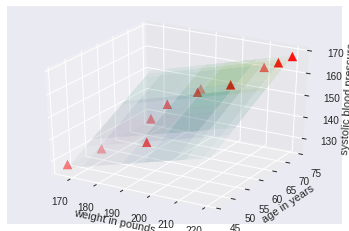

In [182]:
ax = plt.axes(projection='3d')
ax.plot_surface(X2, X3, X1, rstride=1, cstride=1, 
                cmap='viridis', edgecolor=None, alpha=0.01)
ax.scatter(sdf['lbs'],sdf['age'], sdf['BP'], c='r', marker='^', s=80)
ax.set_xlabel('weight in pounds')
ax.set_ylabel('age in years')
ax.set_zlabel('systolic blood pressure')
plt.show()